In [1]:
from IPython.display import HTML
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
Код для цього блокноту заховано.Щоб подивитися або заховати код, тисніть
 <a href="javascript:code_toggle()">тут</a>.''')

In [2]:
import pandas as pd
import numpy as np
from IPython.display import FileLink
pd.set_option("display.max_rows", None)
import matplotlib.pyplot as plt


#pd.set_option('display.float_format', lambda x: '%.2f' % x)
pd.options.display.float_format = '{:,.2f}'.format

### Таблиця 1. Історичні демографічні дані по Україні за 2008-2018 рік.
#### Показано в таблиці 2012-2018 рр.Зберігається за 2008-2018 рр. 

In [3]:
#исторические данные
#http://database.ukrcensus.gov.ua/MULT/Dialog/statfile_c_files/pasport.files/pasport/00_uk.htm#0301
#http://database.ukrcensus.gov.ua/PXWEB2007/ukr/publ_new1/2018/zb_dy_2017.pdf


naselennya_vse=pd.Series([46372664,46143714,45962947,45778534,45633637,45553047,45426249,42929298,42760516,42584542,42386403],\
                         index=list(np.arange(2008,2019)),name='Населення України')
miske_nas=pd.Series([31668757,31587203,31524795,31441649,31380874,31378639,31336623,29673113,29584952,29482313,29370995],\
                    index=list(np.arange(2008,2019)),name='Міське населення')
silske_nas=pd.Series([14703907,14556511,14438152,14336885,14252763,14174408,14089626,13256185,13175564,13102229,13015408],\
                     index=list(np.arange(2008,2019)),name='Сільське населення')

zhivonar=pd.Series([510589,512525,497689,502595,520705,503657,465882,411781,397037,363987],\
                   index=list(np.arange(2008,2018)),name='Живонароджених')
zhivonar_m=pd.Series([263588,264844,256835,259433,268748,259738,240043,212846,205194,187528],\
                    index=list(np.arange(2008,2018)),name='Живонароджених чоловіків')
zhivonar_f=pd.Series([247001,247681,240854,243162,251957,243919,225839,198935,191843,176459],\
                    index=list(np.arange(2008,2018)),name='Живонароджених жінок')
zhivonar_na_1000_nas=pd.Series([11.0,11.1,10.8,11.0,11.4,11.1,10.8,10.7,10.3,9.4],\
                               index=list(np.arange(2008,2018)),name='Живонароджених на 1000 населення')

mertvonar_all=pd.Series([3416,3351,3300,3158,3230,3166,2820,2437,2244,2136],\
                       index=list(np.arange(2008,2018)),name='Мертвонароджених')
mertvonar_m=pd.Series([1801,1821,1719,1649,1734,1683,1502,1322,1159,1090],\
                     index=list(np.arange(2008,2018)),name='Мертвонароджених чоловіків')
mertvonar_f=pd.Series([1615,1530,1581,1509,1496,1483,1318,1115,1085,1046],\
                     index=list(np.arange(2008,2018)),name='Мертвонароджених жінок')                    
                   

pomerlyh=pd.Series([754460,706739,698235,664588,663139,662368,632296,594796,583631,574123],\
                   index=list(np.arange(2008,2018)),name='Померлих')
pomer_na_1000_nas=pd.Series([16.3,15.3,15.2,14.5,14.5,14.6,14.7,14.9,14.7,14.5],\
                            index=list(np.arange(2008,2018)),name='Померлих на 1000 населення')



#https://ukrstat.org/uk/operativ/operativ2018/ds/mr/mr_u/mr1218_u.html
#Міграційний приріст, скорочення (–)
#[2011,2012,2013,2014,2015,2016,2017]
migraciya=pd.Series([17096,61844,31913,22592,14233,10620,11997],\
                    index=list(np.arange(2011,2018)),name='Міграційний приріст, скорочення (–)')
ukrstat=pd.concat([naselennya_vse,miske_nas,silske_nas,zhivonar,zhivonar_m,zhivonar_f,zhivonar_na_1000_nas,\
         mertvonar_all,mertvonar_m,mertvonar_f,pomerlyh,pomer_na_1000_nas,migraciya],axis=1).T
ukrstat[[2012,2013,2014,2015,2016,2017,2018]]

,2012,2013,2014,2015,2016,2017,2018
Населення України,"45,633,637.00","45,553,047.00","45,426,249.00","42,929,298.00","42,760,516.00","42,584,542.00","42,386,403.00"
Міське населення,"31,380,874.00","31,378,639.00","31,336,623.00","29,673,113.00","29,584,952.00","29,482,313.00","29,370,995.00"
Сільське населення,"14,252,763.00","14,174,408.00","14,089,626.00","13,256,185.00","13,175,564.00","13,102,229.00","13,015,408.00"
Живонароджених,"520,705.00","503,657.00","465,882.00","411,781.00","397,037.00","363,987.00",nan
Живонароджених чоловіків,"268,748.00","259,738.00","240,043.00","212,846.00","205,194.00","187,528.00",nan
Живонароджених жінок,"251,957.00","243,919.00","225,839.00","198,935.00","191,843.00","176,459.00",nan
Живонароджених на 1000 населення,11.40,11.10,10.80,10.70,10.30,9.40,nan
Мертвонароджених,"3,230.00","3,166.00","2,820.00","2,437.00","2,244.00","2,136.00",nan
Мертвонароджених чоловіків,"1,734.00","1,683.00","1,502.00","1,322.00","1,159.00","1,090.00",nan
Мертвонароджених жінок,"1,496.00","1,483.00","1,318.00","1,115.00","1,085.00","1,046.00",nan


Джерела: 
* "Демографічний паспорт -  Україна": *http://database.ukrcensus.gov.ua/MULT/Dialog/statfile_c_files/pasport.files/pasport/00_uk.htm#0301*
* "Населення України за 2017 рік.Демографічний щорічник.":
*http://database.ukrcensus.gov.ua/PXWEB2007/ukr/publ_new1/2018/zb_dy_2017.pdf
* "Міграційний рух населення" :
*https://ukrstat.org/uk/operativ/operativ2017/ds/mr/mr_u/mr1217_u.html

Таблиця 2: Розподіл постійного населення за статтю, віковими групами з 2012 по 2018 рр.

In [4]:
pop=pd.read_excel('data/pop_per_year.xlsx')
pop.pivot(index='вік',columns='рік')#с 2012 по 2018 по годам жизни мужчины и женщины

Обидві статі                                                        \
рік         2012     2013     2014     2015     2016     2017     2018   
вік                                                                      
0         498975   517301   500484   463048   409172   394626   361789   
1         493356   498371   516810   471667   462489   408645   394316   
2         507656   493244   498240   487489   471450   462265   408532   
3         505325   507600   493186   470674   487356   471308   462137   
4         467005   505271   507595   465766   470537   487231   471199   
5         455095   466956   505260   479839   465685   470434   487123   
6         420822   455065   466967   477711   479739   465594   470302   
7         422104   420828   455060   441282   477651   479645   465514   
8         403225   422107   420812   431088   441212   477573   479558   
9         384845   403202   422107   398992   431011   441134   477474   
10        369864   384840   403163   400157   398896   430964   441059   
11        380938   369865   384829   382164   400099   398813   430887   
12        385536   380934   369864   365500   382049   400030   398720   
13        409571   385468   380885   351654   365398   381977   399954   
14        427214   409546   385427   362140   351549   365297   381926   
15        461601   427125   409399   366788   362018   351424   365209   
16        479618   461646   427112   390627   366728   361912   351393   
17        498888   481022   462666   408118   390967   366734   362205   
18        528571   502395   483504   443864   409303   391384   368336   
19        569467   532948   505129   464199   445062   410177   393500   
20        610911   573923   534986   483467   464844   445603   411514   
21        642654   614901   575090   511154   483136   465040   445723   
22        673409   646471   615346   548143   510561   483244   464281   
23        717141   676892   646632   584697   547499   510421   482355   
24        741708   719970   676584   613202   583881   547264   509637   
25        786701   743412   719107   640357   612369   583565   546341   
26        763694   787692   742674   679712   639634   611950   582797   
27        780792   764199   786978   701238   678904   639041   611096   
28        793319   780740   763407   744255   700457   678228   638355   
29        723255   792949   779918   721602   743322   699675   677361   
30        700176   722705   791715   738136   720706   742282   698733   
31        714449   699290   721483   747421   736924   719665   741196   
32        674597   713301   698055   679908   746069   735679   718508   
33        669788   673094   711629   658374   678493   744597   734367   
34        648193   668208   671304   672724   656924   677042   743118   
35        681425   646372   666215   634644   671042   655291   675531   
36        667508   679662   644369   629955   632843   669283   653759   
37        650087   665450   677386   608762   628059   630860   667400   
38        632859   647888   663157   641010   606774   625961   628973   
39        652532   630729   645479   627781   638746   604617   623854   
40        645986   650182   628300   610769   625422   636361   602372   
41        639673   643465   647506   595104   608258   623018   634056   
42        589634   637092   640779   612953   592620   605632   620601   
43        598725   586960   634139   607062   610260   589869   602877   
44        590545   595845   584185   601018   604322   607385   587140   
45        608975   587394   592680   552110   598204   601245   604581   
46        603191   605694   583990   560016   549243   595107   598111   
47        629853   599831   602073   551663   556754   546188   591828   
48        671496   625896   596037   567394   548420   553304   543027   
49        688262   666952   621644   560689   563779   544798   549883   
50        711501   683177   661870   584673   556891   559851   540919   
51      

Джерело:*Розподіл постійного населення за статтю, віковими групами та типом поселень (http://database.ukrcensus.gov.ua)*

## Коефіцієнти для побудови демографічної моделі

In [5]:
#коэффициенты відтворення та міграції по мужчинам и женщинам
#выделены из файлы модели, нужно сделать отдельными сериями,чтобы не привязываться к файлам
koef_vidtvorennya_nas_f=pd.read_excel('data/Copy of Демографическая модель изменения населения Украины.xlsx',\
                                     sheet_name='Sheet1')['відтворення населення жінки']
koef_vidtvorennya_nas_m=pd.read_excel('data/Copy of Демографическая модель изменения населения Украины.xlsx',\
                                     sheet_name='Sheet1')['відтворення населення чоловіка']
koef_mizhnar_saldo_f=pd.read_excel('data/Copy of Демографическая модель изменения населения Украины.xlsx',\
                                     sheet_name='Sheet1')['міжнародне сально жінки']
koef_mizhnar_saldo_m=pd.read_excel('data/Copy of Демографическая модель изменения населения Украины.xlsx',\
                                     sheet_name='Sheet1')['міжнародне сальдо чоловіка']

1.Коефіцієнти відтворення та міграції (історичні,з існуючої моделі 2012 року)

In [6]:
koefs=pd.concat([koef_vidtvorennya_nas_f,koef_vidtvorennya_nas_m,\
          koef_mizhnar_saldo_f,koef_mizhnar_saldo_m],axis=1)
koefs

,відтворення населення жінки,відтворення населення чоловіка,міжнародне сально жінки,міжнародне сальдо чоловіка
0,0.56,0.77,0.48,0.24
1,0.03,0.04,0.48,0.24
2,0.03,0.04,0.48,0.24
3,0.03,0.04,0.48,0.24
4,0.03,0.04,0.48,0.24
5,0.01,0.02,0.23,0.11
6,0.01,0.02,0.23,0.11
7,0.01,0.02,0.23,0.11
8,0.01,0.02,0.23,0.11
9,0.01,0.02,0.23,0.11


In [7]:
# коэффициенты по модели 2012 года,в 
koef_zhyvonar2012=99.3835113134263 #коэффициент живорожденных от рожденных
koef_mertvonar2012=0.616488686573717 #коэффициент мертворожденных от родженных
koef_pomer2012=1.45894635287282 #коэффициент умерших от всего населения

koef_usogo_nar_f2012=48.3748938322502 #коэффициент всего рожденных женщин
koef_zhivonar_f2012=48.3876667210801 #коэффициент живорожденных женщин
koef_mertvonar_f2012=46.3157894736842 #коэффициент мертворожденных женщин
koef_pomer_f2012=50.9026011137936 #коэффициент умерших женщин

  #коэффициенты по мужчинам
koef_usogo_nar_m2012=51.6251061677498
koef_zhivonar_m2012=51.6123332789199
koef_mertvonar_m2012=53.6842105263158
koef_pomer_m2012=49.0973988862064

    #коэффициенты миграции
koef_migrant_f2012=30.6820386779639
koef_migrant_m2012=69.3179613220361

2.Розраховуємо коефіцієнти за даними 2017 року:

- всього народжених=живонароджених+мертвонароджених
- коефіцієнти живонароджених та мертвонароджених=частка від всього народжених
- коефіцієнт померлих= частка від всього населення
- коефіцієнти по чоловікам та жінкам= відповідна пропорція

In [8]:
#считаем коеф по данным 2017 года:

narodzhennyh=zhivonar+mertvonar_all
narodzhennyh.name='Народженних'
koef_zhyvonar=zhivonar[2017]/narodzhennyh[2017]*100
koef_mertvonar=mertvonar_all[2017]/narodzhennyh[2017]*100
koef_pomer=pomerlyh[2017]/naselennya_vse[2017]*100

#коэффициенты по женщинам
koef_usogo_nar_f=(zhivonar_f[2017]+mertvonar_f[2017])/narodzhennyh[2017]*100#коэффициент всего рожденных женщин
koef_zhivonar_f= zhivonar_f[2017]/narodzhennyh[2017]*100#коэффициент живорожденных женщин
koef_mertvonar_f= mertvonar_f[2017]/mertvonar_all[2017]*100#коэффициент мертворожденных женщин
koef_pomer_f=50.9026011137936 #коэффициент умерших женщин

#коэффициенты по мужчинам
koef_usogo_nar_m=100-koef_usogo_nar_f
koef_zhivonar_m=100-koef_zhivonar_f
koef_mertvonar_m=100-koef_mertvonar_f
koef_pomer_m=49.0973988862064

#коэффициенты миграции
koef_migrant_f=30.6820386779639
koef_migrant_m=69.3179613220361

3.Порівняння коефіцієнтів 2012 та 2017 років:

In [9]:
iterables=[['коэффициент живорожденных от рожденных',\
                                                     'коэффициент мертворожденных от родженных',\
                                                     'коэффициент умерших от всего населения'],\
                           ['чоловіки і жінки','чоловіки','жінки']]
index=pd.MultiIndex.from_product(iterables)
empty=pd.DataFrame(index=index,columns=[2012,2017])
empty.loc[('коэффициент умерших от всего населения'),2012]=[koef_pomer2012,koef_pomer_m2012,koef_pomer_f]
empty.loc[('коэффициент умерших от всего населения'),2017]=[koef_pomer,koef_pomer_m,koef_pomer_f]
empty.loc[('коэффициент мертворожденных от родженных'),2012]=[koef_mertvonar2012,koef_mertvonar_m2012,koef_mertvonar_f2012]
empty.loc[('коэффициент мертворожденных от родженных'),2017]=[koef_mertvonar,koef_mertvonar_m,koef_mertvonar_f]
empty.loc[('коэффициент живорожденных от рожденных'),2012]=[koef_zhyvonar2012,koef_zhivonar_m2012,koef_zhivonar_f2012]
empty.loc[('коэффициент живорожденных от рожденных'),2017]=[koef_zhyvonar,koef_zhivonar_m,koef_zhivonar_f]
empty

2012  2017
коэффициент живорожденных от рожденных   чоловіки і жінки 99.38 99.42
                                         чоловіки         51.61 51.80
                                         жінки            48.39 48.20
коэффициент мертворожденных от родженных чоловіки і жінки  0.62  0.58
                                         чоловіки         53.68 51.03
                                         жінки            46.32 48.97
коэффициент умерших от всего населения   чоловіки і жінки  1.46  1.35
                                         чоловіки         49.10 49.10
                                         жінки            50.90 50.90

In [10]:
iterables=[['коэффициент всего рожденных','коэффициенты миграции'],\
                           ['чоловіки','жінки']]
index=pd.MultiIndex.from_product(iterables)
empty=pd.DataFrame(index=index,columns=[2012,2017])
empty.loc[('коэффициент всего рожденных'),2012]=[koef_usogo_nar_m2012,koef_usogo_nar_f2012]
empty.loc[('коэффициент всего рожденных'),2017]=[koef_usogo_nar_m,koef_usogo_nar_f]
empty.loc[('коэффициенты миграции'),2012]=[koef_migrant_m2012,koef_migrant_f2012]
empty.loc[('коэффициенты миграции'),2017]=[koef_migrant_m,koef_migrant_f]
empty

2012  2017
коэффициент всего рожденных чоловіки 51.63 51.52
                            жінки    48.37 48.48
коэффициенты миграции       чоловіки 69.32 69.32
                            жінки    30.68 30.68

## Демографічна модель

Вхід: віковий розподіл кількості чоловіків та жінок на поточний рік, заданий коефіцієнт фертильності - кількість дітей на 1000 жінок дітородного віку, коефіцієнт міграції.

Як працює модель:
1. За даними вікового розподілу та попередньо розрахованих коефіцієнтів, розраховуються демографічні показники за поточний період:
    - всього населення
    - кількість жінок дітородного віку
    - кількість живонароджених, мертвонароджених 
    - кількість померлих всього
    - віковий розподіл відтворення населення по чоловікам та жінкам
    - віковий розподіл по мігрантам по чоловікам та жінкам
2. Розраховується віковий розподіл жінок/чоловіків за наступний період (прогноз наступного року):
    - розподіл поточного року "зсувається" на один рік, тобто зникає останній показник вікового розподілу,а перший показник виникає як сума живонароджених за поточний період, відтворення першого року життя за попередній період та кількість мігрантів за попередній період, всі інші цифри розподілу - це суми останніх двох показників та значення попереднього року "зсунотого" розподілу.
3. Розрахований прогноз вікового розподілу стає вхідними даними для розрахунку прогнозу наступного року і т.д. 

In [11]:
# на входе функции серия женщин по годам жизни,серия мужчины по годам жизни,
# кол-во детей на 1000 женщин,коеффициент миграции
def model(f_years,m_years,koef_fert,koef_migrant):
    popTotal=f_years.sum()+m_years.sum()
    fertilnyh=f_years[18:50].sum()
    narodzhennyh=fertilnyh*koef_fert/1000
    zhivonarodzhennyh=narodzhennyh*koef_zhyvonar/100
    mertvonarodzhennyh=narodzhennyh*koef_mertvonar/100
    pomer=popTotal*koef_pomer/100
    
    all_data=pd.Series({'fertilnyh':fertilnyh,'narodzhennyh':narodzhennyh,\
    'zhivonarodzhennyh':zhivonarodzhennyh,\
    'mertvonarodzhennyh':mertvonarodzhennyh,\
    'pomer':pomer})
    
    #количества по женщинам за текущий год
    usogo_nar_f=narodzhennyh*koef_usogo_nar_f/100 #всего рожденных женщин
    zhivonar_f=koef_zhivonar_f/100*zhivonarodzhennyh #количество живорожденных женщин
    mertvonar_f=koef_mertvonar_f/100*mertvonarodzhennyh #количество мертворожденных женщин
    pomer_f=koef_pomer_f/100*pomer #количество умерших женщин
    
    data_f=pd.Series({'usogo_nar_f':usogo_nar_f,'zhivonar_f':zhivonar_f,\
                      'mertvonar_f':mertvonar_f,'pomer_f':pomer_f})#для проверки
    
    #количества по мужчинам за текущий год
    zhivonar_m=koef_zhivonar_m/100*zhivonarodzhennyh
    usogo_nar_m=narodzhennyh*koef_usogo_nar_m/100
    mertvonar_m=koef_mertvonar_m/100*mertvonarodzhennyh
    pomer_m=koef_pomer_m/100*pomer
    
    data_m=pd.Series({'usogo_nar_m':usogo_nar_m,'zhivonar_m':zhivonar_m,\
                     'mertvonar_m':mertvonar_m,'pomer_m':pomer_m})#для проверки
    
    #серии відтворення населення
    vidtvorennya_nas_f=pd.Series(pomer_f*koef_vidtvorennya_nas_f/100*(-1))
    vidtvorennya_nas_m=pd.Series(pomer_m*koef_vidtvorennya_nas_m/100*(-1))
    
    # серии мигрантов
    migrant=popTotal*koef_migrant/100
    migrant_f=migrant*koef_migrant_f/100
    migrant_f_years=pd.Series(koef_mizhnar_saldo_f*migrant_f/100)
    migrant_m=migrant*koef_migrant_m/100
    migrant_m_years=pd.Series(koef_mizhnar_saldo_m*migrant_m/100)
    
    # серии женщин следующего года по годам жизни
    rest1=f_years[:-1]
    rest2=vidtvorennya_nas_f.drop(0).reset_index(drop=True)
    rest3=migrant_f_years.drop(0).reset_index(drop=True)
    rest1=rest1.astype('float64')
    rest4=rest1+rest2+rest3
    rest4=rest4[:-1]
    rest_first=zhivonar_f+vidtvorennya_nas_f[0]+migrant_f_years[0]
    rest_last=pd.Series(f_years.iloc[-1]+f_years.iloc[-2]+\
                vidtvorennya_nas_f.iloc[-1]+\
                migrant_f_years.iloc[-1])
    rest=rest4.append(rest_last).reset_index(drop=True)
    rest.index=rest.index+1
    rest_f=pd.concat([rest, pd.Series(rest_first)])
    female_next=rest_f.sort_index()
    
    rest_series=pd.Series({'rest':rest,'rest1':rest1,\
                           'rest2':rest2,'rest3':rest3,\
                           'rest4':rest4,\
                           'rest_first':rest_first,'rest_last':rest_last})
    
    # серии мужчин следующего года по годам жизни
    mrest1=m_years[:-1]
    mrest2=vidtvorennya_nas_m.drop(0).reset_index(drop=True)
    mrest3=migrant_m_years.drop(0).reset_index(drop=True)
    mrest1=mrest1.astype('float64')
    mrest4=mrest1+mrest2+mrest3
    mrest4=mrest4[:-1]
    mrest_first=zhivonar_m+vidtvorennya_nas_m[0]+migrant_m_years[0]
    mrest_last=pd.Series(m_years.iloc[-1]+m_years.iloc[-2]+\
                vidtvorennya_nas_m.iloc[-1]+\
                migrant_m_years.iloc[-1])
    mrest=mrest4.append(mrest_last).reset_index(drop=True)
    mrest.index=mrest.index+1
    rest_m=pd.concat([mrest, pd.Series(mrest_first)])
    male_next=rest_m.sort_index()
    pop_next=female_next+male_next
    pop_next_total=pop_next.sum()
    
     
    
    return female_next,male_next,pop_next_total,vidtvorennya_nas_f,narodzhennyh,pomer,vidtvorennya_nas_m,migrant_f_years,migrant_m_years       
   

In [12]:
#pd.Series(['female_next','male_next','pop_next_total','vidtvorennya_nas_f','narodzhennyh','pomer','vidtvorennya_nas_m','migrant_f_years','migrant_m_years'])
#технічно:для визначення позиції вихідного показника

In [13]:
def prognos_male(year,f_years,m_years,kfert):
    z=[]
    z_m=[]
    ye=[]
    pop_total=f_years.sum()+m_years.sum()
    for i in range(len(kfert)):
        fy=model(f_years,m_years,kfert[i],0.136060581939936)[0]
        my=model(f_years,m_years,kfert[i],0.136060581939936)[1]
        pt=model(f_years,m_years,kfert[i],0.136060581939936)[2]
        z.append(model(f_years,m_years,kfert[i],0.136060581939936)[0])
        z_m.append(model(f_years,m_years,kfert[i],0.136060581939936)[1])#тут змінюємо позицію вихідного показника
        f_years=fy
        m_years=my
        pop_total=pt
        ye.append(year+1+i)
        
    return pd.DataFrame(z_m,ye).T

In [14]:
def prognos_female(year,f_years,m_years,kfert):
    z=[]
    z_m=[]
    ye=[]
    pop_total=f_years.sum()+m_years.sum()
    for i in range(len(kfert)):
        fy=model(f_years,m_years,kfert[i],0.136060581939936)[0]
        my=model(f_years,m_years,kfert[i],0.136060581939936)[1]
        pt=model(f_years,m_years,kfert[i],0.136060581939936)[2]
        z.append(model(f_years,m_years,kfert[i],0.136060581939936)[0])
        z_m.append(model(f_years,m_years,kfert[i],0.136060581939936)[1])
        f_years=fy
        m_years=my
        pop_total=pt
        ye.append(year+1+i)
        
    return pd.DataFrame(z,ye).T

In [15]:
def prognos_narodzh(year,f_years,m_years,kfert):
    z=[]
    z_m=[]
    ye=[]
    pop_total=f_years.sum()+m_years.sum()
    for i in range(len(kfert)):
        fy=model(f_years,m_years,kfert[i],0.136060581939936)[0]
        my=model(f_years,m_years,kfert[i],0.136060581939936)[1]
        pt=model(f_years,m_years,kfert[i],0.136060581939936)[2]
        z.append(model(f_years,m_years,kfert[i],0.136060581939936)[4])
        z_m.append(model(f_years,m_years,kfert[i],0.136060581939936)[1])
        f_years=fy
        m_years=my
        pop_total=pt
        ye.append(year+1+i)
        
    return pd.DataFrame(z,ye).T

In [16]:
def prognos_pomer(year,f_years,m_years,kfert):
    z=[]
    z_m=[]
    ye=[]
    pop_total=f_years.sum()+m_years.sum()
    for i in range(len(kfert)):
        fy=model(f_years,m_years,kfert[i],0.136060581939936)[0]
        my=model(f_years,m_years,kfert[i],0.136060581939936)[1]
        pt=model(f_years,m_years,kfert[i],0.136060581939936)[2]
        z.append(model(f_years,m_years,kfert[i],0.136060581939936)[5])
        z_m.append(model(f_years,m_years,kfert[i],0.136060581939936)[1])
        f_years=fy
        m_years=my
        pop_total=pt
        ye.append(year+1+i)
        
    return pd.DataFrame(z,ye).T

In [17]:
def vidtvor_nas_f(year,f_years,m_years,kfert):
    z=[]
    ye=[]
    pop_total=f_years.sum()+m_years.sum()
    for i in range(len(kfert)):
        fy=model(f_years,m_years,kfert[i],0.136060581939936)[0]
        my=model(f_years,m_years,kfert[i],0.136060581939936)[1]
        pt=model(f_years,m_years,kfert[i],0.136060581939936)[2]
        z.append(model(f_years,m_years,kfert[i],0.136060581939936)[3])
        f_years=fy
        m_years=my
        pop_total=pt
        ye.append(year+i)
        
    return pd.DataFrame(z,ye).T

In [18]:
def migrant_f_years(year,f_years,m_years,kfert):
    z=[]
    ye=[]
    pop_total=f_years.sum()+m_years.sum()
    for i in range(len(kfert)):
        fy=model(f_years,m_years,kfert[i],0.136060581939936)[0]
        my=model(f_years,m_years,kfert[i],0.136060581939936)[1]
        pt=model(f_years,m_years,kfert[i],0.136060581939936)[2]
        z.append(model(f_years,m_years,kfert[i],0.136060581939936)[7])
        f_years=fy
        m_years=my
        pop_total=pt
        ye.append(year+i)
        
    return pd.DataFrame(z,ye).T

In [19]:
def vidtvor_nas_m(year,f_years,m_years,kfert):
    z=[]
    ye=[]
    pop_total=f_years.sum()+m_years.sum()
    for i in range(len(kfert)):
        fy=model(f_years,m_years,kfert[i],0.136060581939936)[0]
        my=model(f_years,m_years,kfert[i],0.136060581939936)[1]
        pt=model(f_years,m_years,kfert[i],0.136060581939936)[2]
        z.append(model(f_years,m_years,kfert[i],0.136060581939936)[6])
        f_years=fy
        m_years=my
        pop_total=pt
        ye.append(year+i)
        
    return pd.DataFrame(z,ye).T

In [20]:
def migrant_m_years(year,f_years,m_years,kfert):
    z=[]
    ye=[]
    pop_total=f_years.sum()+m_years.sum()
    for i in range(len(kfert)):
        fy=model(f_years,m_years,kfert[i],0.136060581939936)[0]
        my=model(f_years,m_years,kfert[i],0.136060581939936)[1]
        pt=model(f_years,m_years,kfert[i],0.136060581939936)[2]
        z.append(model(f_years,m_years,kfert[i],0.136060581939936)[8])
        f_years=fy
        m_years=my
        pop_total=pt
        ye.append(year+i)
        
    return pd.DataFrame(z,ye).T

## Перевірка роботи моделі за даними 2013 року.

З Таблиці 2 беремо вікові розподіли жінок та чоловіків за 2013 рік.

In [21]:
pop2013=pop[pop['рік']==2013]#исходный факт
pop2013[['рік','вік',' жінки',' чоловіки']].head(5)

,рік,вік,жінки,чоловіки
81,2013,0,250481,266820
82,2013,1,241404,256967
83,2013,2,239007,254237
84,2013,3,245566,262034
85,2013,4,244798,260473


Для поганого прогнозу:задамо показник фертильності - 46 дітей на 1000 жінок дітородного віку - незмінний протягом 37 років. 

In [22]:
kfert=np.repeat(46,37)
pd.DataFrame(kfert,index=np.arange(2014,2051)).T

,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,...,2041,2042,2043,2044,2045,2046,2047,2048,2049,2050
0,46,46,46,46,46,46,46,46,46,46,...,46,46,46,46,46,46,46,46,46,46


Повертаємо коефіцієнти 2012 року для точного відтворення моделі.

In [23]:
# коэффициенты по модели 2012 года,в 
koef_zhyvonar=99.3835113134263 #коэффициент живорожденных от рожденных
koef_mertvonar=0.616488686573717 #коэффициент мертворожденных от родженных
koef_pomer=1.45894635287282 #коэффициент умерших от всего населения

koef_usogo_nar_f=48.3748938322502 #коэффициент всего рожденных женщин
koef_zhivonar_f=48.3876667210801 #коэффициент живорожденных женщин
koef_mertvonar_f=46.3157894736842 #коэффициент мертворожденных женщин
koef_pomer_f=50.9026011137936 #коэффициент умерших женщин

  #коэффициенты по мужчинам
koef_usogo_nar_m=51.6251061677498
koef_zhivonar_m=51.6123332789199
koef_mertvonar_m=53.6842105263158
koef_pomer_m=49.0973988862064

    #коэффициенты миграции
koef_migrant_f=30.6820386779639
koef_migrant_m=69.3179613220361

In [24]:
f=pop2013[' жінки'].reset_index(drop=True)
m=pop2013[' чоловіки'].reset_index(drop=True)

In [25]:
pr_f=prognos_female(2013,f,m,kfert)
pr_m=prognos_male(2013,f,m,kfert)
pr_nas_bad=pr_f.sum()+pr_m.sum()

Змінюємо показник кількості дітей на 1000 жінок дітородного віку для доброго прогнозу.

In [26]:
kfert=np.insert(np.repeat(95,28),[0],[46,46,60,65,70,75,80,85,90])

In [27]:
pd.DataFrame(kfert,index=np.arange(2014,2051)).T

,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,...,2041,2042,2043,2044,2045,2046,2047,2048,2049,2050
0,46,46,60,65,70,75,80,85,90,95,...,95,95,95,95,95,95,95,95,95,95


In [28]:
pr_f=prognos_female(2013,f,m,kfert)
pr_m=prognos_male(2013,f,m,kfert)
pr_nas_good=pr_f.sum()+pr_m.sum()

Таблиця прогнозів по данним 2013 року.

In [29]:
bad=pd.DataFrame(pr_nas_bad,columns=['bad'])
good=pd.DataFrame(pr_nas_good,columns=['good'])
pd.concat([bad,good],axis=1).T

,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,...,2041,2042,2043,2044,2045,2046,2047,2048,2049,2050
bad,"45,257,331.87","45,137,595.51","45,014,305.40","44,887,522.51","44,756,956.87","44,622,638.99","44,484,438.99","44,342,436.42","44,195,957.65","44,045,430.65",...,"40,855,898.24","40,648,851.04","40,440,460.85","40,231,491.47","40,022,710.77","39,814,677.12","39,607,708.41","39,402,107.99","39,198,514.25","38,997,150.56"
good,"45,257,331.87","45,137,595.51","45,158,514.14","45,223,419.05","45,330,101.68","45,476,788.94","45,661,446.36","45,882,391.63","46,136,502.29","46,422,717.88",...,"49,629,506.69","49,774,505.48","49,930,071.77","50,097,356.75","50,277,547.56","50,471,398.13","50,679,200.50","50,901,261.69","51,138,550.48","51,391,188.18"


## Побудова моделі за даними 2017 року.

З таблиці 2 беремо віковий розподіл кількості жінок та чоловіків за 2017 рік

In [30]:
pop2017=pop[pop['рік']==2017]#исходный факт
pop2017.head(2)

,рік,вік,Обидві статі,жінки,чоловіки
405,2017,0,394626,190833,203793
406,2017,1,408645,197600,211045


Перераховуємо коефіцієнти на 2017 рік.

In [31]:
#считаем коеф по данным 2017 года:

narodzhennyh=zhivonar+mertvonar_all
narodzhennyh.name='Народженних'
koef_zhyvonar=zhivonar[2017]/narodzhennyh[2017]*100
koef_mertvonar=mertvonar_all[2017]/narodzhennyh[2017]*100
koef_pomer=pomerlyh[2017]/naselennya_vse[2017]*100

#коэффициенты по женщинам
koef_usogo_nar_f=(zhivonar_f[2017]+mertvonar_f[2017])/narodzhennyh[2017]*100#коэффициент всего рожденных женщин
koef_zhivonar_f= zhivonar_f[2017]/narodzhennyh[2017]*100#коэффициент живорожденных женщин
koef_mertvonar_f= mertvonar_f[2017]/mertvonar_all[2017]*100#коэффициент мертворожденных женщин
koef_pomer_f=50.9026011137936 #коэффициент умерших женщин

#коэффициенты по мужчинам
koef_usogo_nar_m=100-koef_usogo_nar_f
koef_zhivonar_m=100-koef_zhivonar_f
koef_mertvonar_m=100-koef_mertvonar_f
koef_pomer_m=49.0973988862064

#коэффициенты миграции
koef_migrant_f=30.6820386779639
koef_migrant_m=69.3179613220361

In [32]:
f=pop2017[' жінки'].reset_index(drop=True)
m=pop2017[' чоловіки'].reset_index(drop=True)

Показник кількості народжених дітей на 1000 жінок дітородного віку за 2017 рік:

In [33]:
narodzhennyh[2017]/f[18:50].sum()*1000

38.15601212286568

У порівнянні, цей же показник за 2012 рік

In [34]:
pop2012=pop[pop['рік']==2012]
f2012=pop2012[' жінки'].reset_index(drop=True)
narodzhennyh[2012]/f2012[18:50].sum()*1000

48.79986796321524

Для поганого прогнозу залишаємо розрахований показник 2017 року - 38

Для доброго прогнозу використовуємо послідовність показника кількості дітей на 1000 жінок дітородного віку:

In [35]:
kfert_good=np.insert(np.repeat(95,24),[0],[38,38,40,50,60,70,80,85,90])
table_koef_good2017=pd.DataFrame(kfert_good,index=np.arange(2018,2051)).T
table_koef_good2017

,2018,2019,2020,2021,2022,2023,2024,2025,2026,2027,...,2041,2042,2043,2044,2045,2046,2047,2048,2049,2050
0,38,38,40,50,60,70,80,85,90,95,...,95,95,95,95,95,95,95,95,95,95


Вихідні дані моделі двох прогнозів - населення України:

In [36]:
#прогнозы с 2018 года по 2050 с постоянным уровнем фертильности 2017 года 
#-38 -"Народилося в Україні на 1000 жінок дітородного віку"
pr_f=prognos_female(2017,f,m,np.repeat(38,33))
pr_m=prognos_male(2017,f,m,np.repeat(38,33))
pr_nas_bad=pr_f.sum()+pr_m.sum()

#прогнозы с 2018 года по 2050 с возрастающим уровнем фертильности 2017 года 
# до 95 "Народилося в Україні на 1000 жінок дітородного віку"
opt_f=prognos_female(2017,f,m,kfert_good)
opt_m=prognos_male(2017,f,m,kfert_good)
pr_nas_good=opt_f.sum()+opt_m.sum()

In [37]:
bad=pd.DataFrame(pr_nas_bad,columns=['bad'])
good=pd.DataFrame(pr_nas_good,columns=['good'])
table_twoprog2017=pd.concat([bad,good],axis=1).T
table_twoprog2017

,2018,2019,2020,2021,2022,2023,2024,2025,2026,2027,...,2041,2042,2043,2044,2045,2046,2047,2048,2049,2050
bad,"42,263,277.74","42,109,194.45","41,952,550.85","41,793,409.11","41,631,230.16","41,466,327.61","41,298,962.85","41,129,548.29","40,958,470.87","40,785,645.65",...,"38,164,686.81","37,954,036.08","37,741,518.89","37,527,751.28","37,313,328.54","37,098,681.31","36,884,039.19","36,669,657.94","36,456,074.23","36,243,513.21"
good,"42,263,277.74","42,109,194.45","41,971,170.68","41,922,133.74","41,957,791.75","42,075,013.49","42,270,821.52","42,499,242.94","42,759,664.90","43,050,457.43",...,"45,766,794.57","45,870,152.83","45,978,139.09","46,093,964.72","46,220,742.28","46,361,100.90","46,515,220.40","46,683,396.40","46,866,592.60","47,065,003.61"


Прогнози народжених та померлих за добрим прогнозом та їх графік:

In [38]:
pr_nar=prognos_narodzh(2017,f,m,kfert_good)
pr_nar.index=['прогноз народжених']

In [39]:
pr_pom=prognos_pomer(2017,f,m,kfert_good)

In [40]:
pr_pom.index=['прогноз померлих']
prog1=pd.concat([pr_nar,pr_pom])
prog1

,2018,2019,2020,2021,2022,2023,2024,2025,2026,2027,...,2041,2042,2043,2044,2045,2046,2047,2048,2049,2050
прогноз народжених,"364,626.00","360,306.85","374,581.95","462,408.13","547,002.22","629,479.35","709,956.04","745,148.19","780,121.56","813,845.53",...,"661,077.74","661,975.73","667,891.08","677,093.06","689,521.48","704,727.96","720,280.92","736,299.01","753,457.83","770,995.54"
прогноз померлих,"571,835.96","569,791.73","567,714.38","565,853.55","565,192.44","565,673.18","567,253.56","569,893.43","572,973.00","576,484.00",...,"615,627.61","617,025.99","618,419.47","619,875.33","621,436.89","623,146.10","625,038.41","627,116.24","629,383.58","631,853.43"


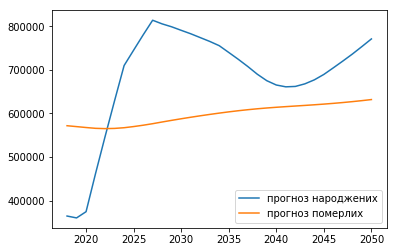

In [41]:
prog1.T.plot.line()
plt.show()

Історичні дані:

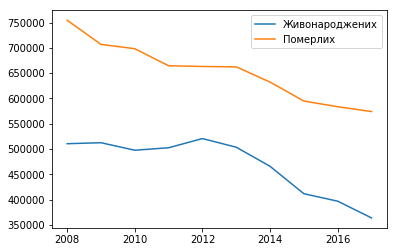

In [42]:
ukrstat.loc[['Живонароджених','Померлих']].T.plot.line()

#### Проміжні дані доброго прогнозу вікового розподілу жінок та чоловіків

In [43]:
vidt_f=vidtvor_nas_f(2017,f,m,kfert_good)

In [44]:
migr_f=migrant_f_years(2017,f,m,kfert_good)

In [45]:
z_order = pd.Categorical(['Жінок','Відтворення', 'Міжнар_мігр'],ordered=True)
table_f2017=pd.concat([opt_f,vidt_f, migr_f], axis=1, keys=z_order).reorder_levels([1,0],axis=1).sort_index(axis=1)
table_f2017=table_f2017.reindex(columns=z_order,level=1)
table_f2017.loc[:,(2017,'Жінок')]=pop2017[' жінки'].reset_index(drop=True) 
table_f2017=table_f2017.sort_index(axis=1).reindex(columns=z_order,level=1)
table_f2017

2017                                 2018                          \
      Жінок Відтворення Міжнар_мігр        Жінок Відтворення Міжнар_мігр   
0    190833   -1,616.84       84.17   173,179.55   -1,611.06       83.87   
1    197600      -78.90       84.17   190,838.27      -78.62       83.87   
2    224336      -78.90       84.17   197,605.27      -78.62       83.87   
3    228506      -78.90       84.17   224,341.27      -78.62       83.87   
4    236030      -78.90       84.17   228,511.27      -78.62       83.87   
5    227967      -38.46       40.13   236,031.67      -38.32       39.98   
6    225856      -38.46       40.13   227,968.67      -38.32       39.98   
7    232042      -38.46       40.13   225,857.67      -38.32       39.98   
8    231335      -38.46       40.13   232,043.67      -38.32       39.98   
9    214511      -38.46       40.13   231,336.67      -38.32       39.98   
10   210020      -33.29       23.89   214,501.60      -33.17       23.80   
11   193450      -33.29       23.89   210,010.60      -33.17       23.80   
12   194569      -33.29       23.89   193,440.60      -33.17       23.80   
13   185932      -33.29       23.89   194,559.60      -33.17       23.80   
14   176999      -33.29       23.89   185,922.60      -33.17       23.80   
15   170565      -71.05      563.44   177,491.38      -70.80      561.42   
16   175922      -71.05      563.44   171,057.38      -70.80      561.42   
17   178590      -71.05      563.44   176,414.38      -70.80      561.42   
18   191425      -71.05      563.44   179,082.38      -70.80      561.42   
19   199650      -71.05      563.44   191,917.38      -70.80      561.42   
20   216485     -144.52    1,129.12   200,634.59     -144.01    1,125.08   
21   225537     -144.52    1,129.12   217,469.59     -144.01    1,125.08   
22   234150     -144.52    1,129.12   226,521.59     -144.01    1,125.08   
23   248188     -144.52    1,129.12   235,134.59     -144.01    1,125.08   
24   266346     -144.52    1,129.12   249,172.59     -144.01    1,125.08   
25   284191     -269.56      415.44   266,491.88     -268.60      413.95   
26   298552     -269.56      415.44   284,336.88     -268.60      413.95   
27   312544     -269.56      415.44   298,697.88     -268.60      413.95   
28   332446     -269.56      415.44   312,689.88     -268.60      413.95   
29   343069     -269.56      415.44   332,591.88     -268.60      413.95   
30   365195     -412.02      177.30   342,834.28     -410.54      176.67   
31   355062     -412.02      177.30   364,960.28     -410.54      176.67   
32   363038     -412.02      177.30   354,827.28     -410.54      176.67   
33   368133     -412.02      177.30   362,803.28     -410.54      176.67   
34   334493     -412.02      177.30   367,898.28     -410.54      176.67   
35   327331     -572.06      142.40   334,063.34     -570.02      141.89   
36   334485     -572.06      142.40   326,901.34     -570.02      141.89   
37   316292     -572.06      142.40   334,055.34     -570.02      141.89   
38   315973     -572.06      142.40   315,862.34     -570.02      141.89   
39   307015     -572.06      142.40   315,543.34     -570.02      141.89   
40   323495     -736.94      119.07   306,397.13     -734.30      118.64   
41   319180     -736.94      119.07   322,877.13     -734.30      118.64   
42   311309     -736.94      119.07   318,562.13     -734.30      118.64   
43   303723     -736.94      119.07   310,691.13     -734.30      118.64   
44   314366     -736.94      119.07   303,105.13     -734.30      118.64   
45   310935     -990.11      139.79   313,515.67     -986.57      139.29   
46   308488     -990.11      139.79   310,084.67     -986.57      139.29   
47   285635     -990.11      139.79   307,637.67     -986.57      139.29   
48   290464     -990.11      139.79   284,784.67     -986.57      139.29   
49   288226     -990.11      139.79   289,613.67     -986.57      139.29   
50   297829   -1,625.98      163.49   286,763.50   -1,6

In [46]:
vidt_m=vidtvor_nas_m(2017,f,m,kfert_good)
migr_m=migrant_m_years(2017,f,m,kfert_good)

In [47]:
z_order = pd.Categorical(['Чоловіків','Відтворення', 'Міжнар_мігр'],ordered=True)
table_m2017=pd.concat([opt_m,vidt_m, migr_m], axis=1, keys=z_order).reorder_levels([1,0],axis=1).sort_index(axis=1)
table_m2017.loc[:,(2017,'Чоловіків')]=pop2017[' чоловіки'].reset_index(drop=True) 
table_m2017.sort_index(axis=1,inplace=True)#.reindex(columns=z_order,level=1)
table_m2017=table_m2017.reindex(columns=z_order,level=1)
table_m2017

2017                               2018                          \
   Чоловіків Відтворення Міжнар_мігр  Чоловіків Відтворення Міжнар_мігр   
0     203793   -2,152.34       97.98 185,732.15   -2,144.65       97.63   
1     211045     -107.14       97.98 203,783.84     -106.76       97.63   
2     237929     -107.14       97.98 211,035.84     -106.76       97.63   
3     242802     -107.14       97.98 237,919.84     -106.76       97.63   
4     251201     -107.14       97.98 242,792.84     -106.76       97.63   
5     242467      -49.84       43.11 251,194.27      -49.66       42.96   
6     239738      -49.84       43.11 242,460.27      -49.66       42.96   
7     247603      -49.84       43.11 239,731.27      -49.66       42.96   
8     246238      -49.84       43.11 247,596.27      -49.66       42.96   
9     226623      -49.84       43.11 246,231.27      -49.66       42.96   
10    220944      -51.22       42.74 226,614.52      -51.04       42.59   
11    205363      -51.22       42.74 220,935.52      -51.04       42.59   
12    205461      -51.22       42.74 205,354.52      -51.04       42.59   
13    196045      -51.22       42.74 205,452.52      -51.04       42.59   
14    188298      -51.22       42.74 196,036.52      -51.04       42.59   
15    180859     -171.26    1,581.14 189,707.88     -170.64    1,575.48   
16    185990     -171.26    1,581.14 182,268.88     -170.64    1,575.48   
17    188144     -171.26    1,581.14 187,399.88     -170.64    1,575.48   
18    199959     -171.26    1,581.14 189,553.88     -170.64    1,575.48   
19    210527     -171.26    1,581.14 201,368.88     -170.64    1,575.48   
20    229118     -480.14    2,923.20 212,970.06     -478.42    2,912.75   
21    239503     -480.14    2,923.20 231,561.06     -478.42    2,912.75   
22    249094     -480.14    2,923.20 241,946.06     -478.42    2,912.75   
23    262233     -480.14    2,923.20 251,537.06     -478.42    2,912.75   
24    280918     -480.14    2,923.20 264,676.06     -478.42    2,912.75   
25    299374     -842.83    1,175.59 281,250.76     -839.82    1,171.38   
26    313398     -842.83    1,175.59 299,706.76     -839.82    1,171.38   
27    326497     -842.83    1,175.59 313,730.76     -839.82    1,171.38   
28    345782     -842.83    1,175.59 326,829.76     -839.82    1,171.38   
29    356606     -842.83    1,175.59 346,114.76     -839.82    1,171.38   
30    377087   -1,276.92      507.26 355,836.34   -1,272.35      505.45   
31    364603   -1,276.92      507.26 376,317.34   -1,272.35      505.45   
32    372641   -1,276.92      507.26 363,833.34   -1,272.35      505.45   
33    376464   -1,276.92      507.26 371,871.34   -1,272.35      505.45   
34    342549   -1,276.92      507.26 375,694.34   -1,272.35      505.45   
35    327960   -1,617.36      322.31 341,253.95   -1,611.58      321.16   
36    334798   -1,617.36      322.31 326,664.95   -1,611.58      321.16   
37    314568   -1,617.36      322.31 333,502.95   -1,611.58      321.16   
38    309988   -1,617.36      322.31 313,272.95   -1,611.58      321.16   
39    297602   -1,617.36      322.31 308,692.95   -1,611.58      321.16   
40    312866   -1,928.31      275.65 295,949.34   -1,921.42      274.67   
41    303838   -1,928.31      275.65 311,213.34   -1,921.42      274.67   
42    294323   -1,928.31      275.65 302,185.34   -1,921.42      274.67   
43    286146   -1,928.31      275.65 292,670.34   -1,921.42      274.67   
44    293019   -1,928.31      275.65 284,493.34   -1,921.42      274.67   
45    290310   -2,685.43      270.99 290,604.56   -2,675.83      270.02   
46    286619   -2,685.43      270.99 287,895.56   -2,675.83      270.02   
47    260553   -2,685.43      270.99 284,204.56   -2,675.83      270.02   
48    262840   -2,685.43      270.99 258,138.56   -2,675.83      270.02   
49    256572   -2,685.43      270.99 260,425.56   -2,675.83      270.02   
50    262022   -4,101.52      255.50 252,725.97   -4,086.86      254.58   
51    256251   -4,101.52      255

## Збираємо докупи решту показників слайду 5 та слайду 7

Прогноз населення світу з моделі ООН за 2019 рік:

In [48]:
world_pop=pd.read_csv('https://population.un.org/wpp/Download/Files/1_Indicators%20(Standard)/CSV_FILES/WPP2019_TotalPopulationBySex.csv',encoding='ISO-8859-1')
#world_pop.head()
#world_pop=pd.read_csv("data/WPP2017_TotalPopulationBySex.csv")

In [49]:
wpop_subset=world_pop[(world_pop.Location=='World')&(world_pop.Time>=2020)&\
                      (world_pop.Time<=2050)&(world_pop.Variant=='Medium')].PopTotal

wpop_subset.index=np.arange(2020,2051)
wpop_5=wpop_subset.iloc[::5]/1000
wpop_5.name='Населення світу, млн.осіб'

In [50]:
#как есть прогноз
ukrpop_5=pr_nas_bad.loc[2020:].iloc[::5]/1000000
ukrpop_5.name='Населення України, млн.осіб'

f1849_5=pr_f.iloc[18:50,:].sum().loc[2020:].iloc[::5]/1000000
f1849_5.name='Жінок дітородного віку(18-49) в Україні, млн.осіб'
f1849_5

child_5=(pr_f+pr_m).iloc[0:18,:].sum().loc[2020:].iloc[::5]/1000000
child_5.name='Дітей(0-17) в Україні, млн.осіб'

m_f_5=(pr_m.iloc[18:61,:].sum()+pr_f.iloc[50:61,:].sum()).loc[2020:].iloc[::5]/1000000
m_f_5.name='Чоловіки(18-60) та жінки(50-60) в Україні, млн.осіб'

old_5=(pr_f+pr_m).iloc[61:,:].sum().loc[2020:].iloc[::5]/1000000
old_5.name='Населення від 61 року в Україні, млн.осіб'

kfert_5=pd.Series(np.repeat(37.93,7),index=[2020,2025,2030,2035,2040,2045,2050])
kfert_5.name='Народилося в Україні на 1000 жінок дітородного віку,осіб'

prognos_asis=pd.concat([wpop_5,ukrpop_5,f1849_5,child_5,kfert_5,m_f_5,old_5],axis=1).T
#prognos_asis.to_excel('Прогноз_какесть_2017.xlsx')

#ukrpop_5-(f1849_5+child_5+m_f_5+old_5)#проверка должно быть все 0

Таблиця для слайду 5:

In [51]:
prognos_asis

,2020,2025,2030,2035,2040,2045,2050
"Населення світу, млн.осіб","7,794.80","8,184.44","8,548.49","8,887.52","9,198.85","9,481.80","9,735.03"
"Населення України, млн.осіб",41.95,41.13,40.26,39.36,38.37,37.31,36.24
"Жінок дітородного віку(18-49) в Україні, млн.осіб",9.25,8.67,8.24,7.62,6.80,6.29,6.04
"Дітей(0-17) в Україні, млн.осіб",7.61,7.31,6.57,5.84,5.45,5.03,4.63
"Народилося в Україні на 1000 жінок дітородного віку,осіб",37.93,37.93,37.93,37.93,37.93,37.93,37.93
"Чоловіки(18-60) та жінки(50-60) в Україні, млн.осіб",15.64,14.79,14.69,14.60,14.16,13.05,11.43
"Населення від 61 року в Україні, млн.осіб",9.46,10.35,10.77,11.29,11.96,12.94,14.15


In [52]:
#хороший прогноз
ukrpop_5_good=pr_nas_good.loc[2020:].iloc[::5]/1000000
ukrpop_5_good.name='Населення України, млн.осіб'
child_5=(opt_f+opt_m).iloc[0:18,:].sum().loc[2020:].iloc[::5]/1000000
child_5.name='Дітей(0-17) в Україні, млн.осіб'

f1849_5=opt_f.iloc[18:50,:].sum().loc[2020:].iloc[::5]/1000000
f1849_5.name='Жінок дітородного віку(18-49) в Україні, млн.осіб'
m_f_5=(opt_m.iloc[18:61,:].sum()+opt_f.iloc[50:61,:].sum()).loc[2020:].iloc[::5]/1000000
m_f_5.name='Чоловіки(18-60) та жінки(50-60) в Україні, млн.осіб'

old_5=(opt_f+opt_m).iloc[61:,:].sum().loc[2020:].iloc[::5]/1000000
old_5.name='Населення від 61 року в Україні, млн.осіб'

good_koef=pd.Series(kfert_good,index=np.arange(2018,2051)).loc[2020:].iloc[::5]
good_koef.name='Народилося в Україні на 1000 жінок дітородного віку,осіб'

prognos_good=pd.concat([wpop_5,ukrpop_5_good,f1849_5,child_5,good_koef,m_f_5,old_5],axis=1).T
#prognos_good.to_excel('Прогноз_хороший_2017.xlsx')

#ukrpop_5_good-(f1849_5+child_5+m_f_5+old_5)#проверка должно быть все 0


Таблиця для слайду 7:

In [53]:
prognos_good

,2020,2025,2030,2035,2040,2045,2050
"Населення світу, млн.осіб","7,794.80","8,184.44","8,548.49","8,887.52","9,198.85","9,481.80","9,735.03"
"Населення України, млн.осіб",41.97,42.50,43.86,44.96,45.66,46.22,47.07
"Жінок дітородного віку(18-49) в Україні, млн.осіб",9.25,8.67,8.24,7.62,6.96,7.42,8.31
"Дітей(0-17) в Україні, млн.осіб",7.63,8.71,10.32,11.88,13.22,12.90,12.63
"Народилося в Україні на 1000 жінок дітородного віку,осіб",40.00,85.00,95.00,95.00,95.00,95.00,95.00
"Чоловіки(18-60) та жінки(50-60) в Україні, млн.осіб",15.64,14.79,14.67,14.56,14.25,14.16,13.73
"Населення від 61 року в Україні, млн.осіб",9.46,10.33,10.63,10.91,11.23,11.75,12.39


In [54]:
with pd.ExcelWriter('output.xlsx') as writer:  
    prognos_asis.to_excel(writer, sheet_name='Слайд_5')
    prognos_good.to_excel(writer, sheet_name='Слайд_7')
    ukrstat.to_excel(writer,sheet_name='Демографічні_2008_2018')
    pop.to_excel(writer,sheet_name='Віковий_розподіл_2008_2018')
    koefs.to_excel(writer,sheet_name='Постійні_коефіцієнти')
    table_koef_good2017.to_excel(writer,sheet_name='Змінний_коеф_фертильності')
    table_twoprog2017.to_excel(writer,sheet_name='Прогнози_населення_2018_2050')
    prog1.to_excel(writer,sheet_name='Прогнози_нар_померлих_good')
    table_f2017.to_excel(writer,sheet_name='Прогноз_розподіл_жінки_good')
    table_m2017.to_excel(writer,sheet_name='Прогноз_розподіл_чоловіки_good')
    

Завантажити таблиці цього ноутбуку книгою Excel: 

In [55]:
FileLink('output.xlsx')

D:\Users\o.lukasevych\Documents\Python_Scripts\Ukr_budget\slide5_7\output.xlsx